In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum04/data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [5]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [6]:
# pilih kolom independen dan target
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

# periksa distribusi target
print(y.value_counts())

Beli_Mobil
1    633
0    367
Name: count, dtype: int64


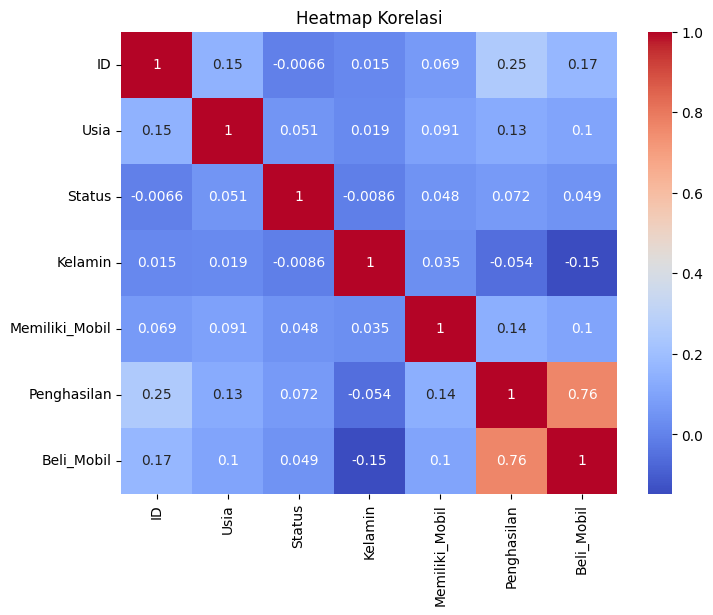

In [9]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data (train/test):", X_train.shape, X_test.shape)

Jumlah data (train/test): (800, 5) (200, 5)


In [11]:
from sklearn.linear_model import LogisticRegression

# membuat dan melatih model
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

# metrik
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model :", acc)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("\nMatriks Kebingungan:\n", confusion_matrix(y_test, y_pred))

Akurasi Model : 0.93

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        73
           1       0.97      0.91      0.94       127

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200


Matriks Kebingungan:
 [[ 70   3]
 [ 11 116]]


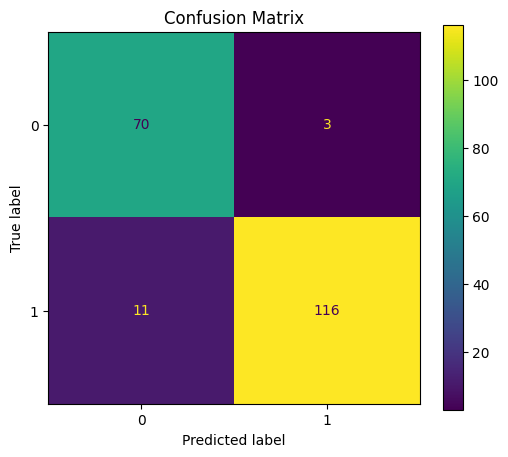

ROC-AUC: 0.9773487218207313


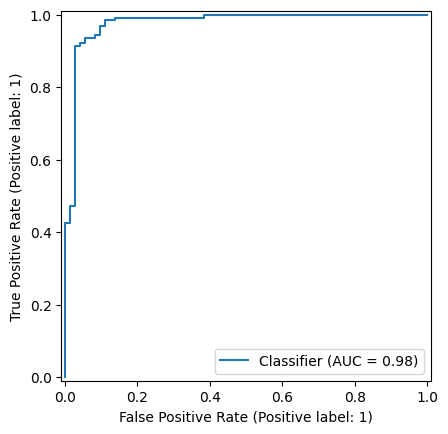

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

# confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC (but pastikan predict_proba ada)
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:,1]
    try:
        roc = roc_auc_score(y_test, y_proba)
        print("ROC-AUC:", roc)
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.show()
    except Exception as e:
        print("Tidak dapat menghitung ROC-AUC:", e)

In [14]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("5-fold CV accuracy scores:", cv_scores)
print("Mean CV accuracy: {:.4f}, std: {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

5-fold CV accuracy scores: [0.785 0.91  0.955 0.945 0.94 ]
Mean CV accuracy: 0.9070, std: 0.0628


In [15]:
# Contoh data baru (sesuaikan sesuai kebutuhan)
data_baru = pd.DataFrame({
    'Usia': [25, 40, 60, 35, 48],
    'Status': [1, 2, 3, 2, 1],
    'Kelamin': [0, 1, 1, 0, 1],
    'Memiliki_Mobil': [0, 1, 1, 0, 2],
    'Penghasilan': [150, 200, 300, 250, 180]
})

prediksi_baru = model.predict(data_baru)
data_baru['Prediksi_Beli_Mobil'] = prediksi_baru
data_baru

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prediksi_Beli_Mobil
0,25,1,0,0,150,0
1,40,2,1,1,200,0
2,60,3,1,1,300,1
3,35,2,0,0,250,1
4,48,1,1,2,180,0


In [17]:
import joblib
joblib.dump(model, '/content/logreg_calonpembeli_model.joblib')
print("Model disimpan di: /content/logreg_calonpembeli_model.joblib")

Model disimpan di: /content/logreg_calonpembeli_model.joblib
